# Data Collection

Download 'food-inspection-violations_1.json' at https://data.world/durhamnc/violation-data
Download 'restaurant-and-services_3.json' and 'restaurant-and-services_4.json' at https://www.kaggle.com/datasets/thedevastator/durham-county-food-inspections/?select=food-health-inspections_2.csv

Import relevant packages and load the three json files into the notebook.

In [179]:
#import all packages needed
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
# Explore contents of 'food-inspection-violations_1.json' from data.world website

# Load JSON file 'food-inspection-violations_1.json' with a context manager
with open('food-inspection-violations_1.json', 'r') as file:
    json_1 = json.load(file)

# Check data type of the json_1 file
print(type(json_1))

# Inspect structure of first element in json_1
json_1[0]

<class 'list'>


{'rpt_area_desc': 'Food Service',
 'comments': '2-301.12 Cleaning Procedure - P2-301.14 When to Wash - PFOOD EMPLOYEES MUST WASH HANDS FOR AT LEAST 15-20 SECONDS AND TURN THE WATER FAUCET OFF WITH THE PAPER TOWEL.  FOOD EMPLOYEE WAS OBSERVED HANDLING READY TO EAT BREAD AFTER HANDLING RAW GROUND BEEF WITHOUT WASHING HANDS AND CHANGING GLOVES. CDI',
 'item': '6',
 'inspection_id': '2385570',
 'critical': None,
 'weight_sum': 2.0,
 'id': '5218844'}

In [181]:
# Explore contents of 'restaurant-and-services_3.json' from Kaggle website

# Load JSON file restaurant-and-services_3.json with a context manager in read mode
with open('restaurant-and-services_3.json', 'r') as file:
    json_3 = json.load(file)


In [182]:
# Explore contents of 'restaurant-and-services_4.json' from Kaggle website

# Load JSON file restaurant-and-services_4.json with a context manager in read mode
with open('restaurant-and-services_4.json', 'r') as file:
    json_4 = json.load(file)

# Data Organization

Convert each json file into a dataframe using the pd.json_normalize() method. The investigate each the columns, data types, contents and statistics of numerical entries in each data frame.

In [183]:
# Convert json_1 to Data Frame
df1 = pd.json_normalize(json_1)

# Print df1 column names
print(df1.columns)

# Print data type of each column in df1
print(df1.dtypes)

# Print first 5 rows of df1
print(df1.head())

# Print description of df1 numerical values
print(df1.describe())

Index(['rpt_area_desc', 'comments', 'item', 'inspection_id', 'critical',
       'weight_sum', 'id'],
      dtype='object')
rpt_area_desc     object
comments          object
item              object
inspection_id     object
critical          object
weight_sum       float64
id                object
dtype: object
  rpt_area_desc                                           comments item  \
0  Food Service  2-301.12 Cleaning Procedure - P2-301.14 When t...    6   
1  Food Service  3-501.19 Time as a Public Health Control - P,P...   22   
2  Food Service  4-501.11 Good Repair and Proper Adjustment-Equ...   45   
3  Food Service  4-602.13 Nonfood Contact Surfaces - CCLEAN ALL...   47   
4   Mobile Food  •6-301.14 Handwashing Signage - C: Post the gi...    8   

  inspection_id critical  weight_sum       id  
0       2385570     None         2.0  5218844  
1       2385570     None         1.0  5218847  
2       2385570     None         2.0  5218851  
3       2385570     None         1.0  5218852

In [184]:
#Check data type of json_3
print(type(json_3))

#Convert json_3 values to a flat DataFrame
df3_draft = pd.json_normalize(json_3)

# Print df3_draft column names
print(df3_draft.columns)

# Print data type of each column in df3_draft
print(df3_draft.dtypes)

#Print first 5 lines in df3_draft
df3_draft.head()

# Print description of df3_draft numerical values
print(df3_draft.describe())

<class 'list'>
Index(['type_description', 'est_group_desc', 'opening_date', 'premise_phone',
       'premise_address1', 'premise_address2', 'seats', 'id', 'premise_state',
       'transitional_type_desc', 'status', 'premise_zip', 'risk', 'insp_freq',
       'premise_city', 'premise_name', 'water', 'rpt_area_desc',
       'closing_date', 'hours_of_operation', 'smoking_allowed', 'sewage',
       'geolocation.lat', 'geolocation.lon', 'geolocation'],
      dtype='object')
type_description           object
est_group_desc             object
opening_date               object
premise_phone              object
premise_address1           object
premise_address2           object
seats                     float64
id                         object
premise_state              object
transitional_type_desc     object
status                     object
premise_zip                object
risk                        int64
insp_freq                   int64
premise_city               object
premise_name     

In [185]:
# Drop the 'geolocation' column; does not add additional information.
df3_draft = df3_draft.drop(['geolocation'], axis = 1)

# Rename the 'geolocation.lat' and geolocation.lon' column to 'latitute' and 'longitude'
df3 = df3_draft.rename(columns ={'geolocation.lat' : 'latitude', 'geolocation.lon' : 'longitude'})

In [186]:
# Check data type of json_4
print(type(json_4))

# Print the keys for json_4
print(json_4.keys())

# Print the di
json_4ft = json_4['features']
print(json_4ft[0])

#Convert json_4 values to a flat DataFrame
df4_draft = pd.json_normalize(json_4ft)

# Print df4 column names
print(df4_draft.columns)

# Print data type of each column in df4
print(df4_draft.dtypes)

#Print first 5 lines in df4
df4_draft.head()

# Print description of df4_draft numerical values
print(df4_draft.describe())

<class 'dict'>
dict_keys(['type', 'features'])
{'geometry': {'type': 'Point', 'coordinates': [-78.9573299, 35.9207272]}, 'type': 'Feature', 'properties': {'type_description': '1 - Restaurant', 'est_group_desc': 'Full-Service Restaurant', 'opening_date': '1994-09-01', 'premise_phone': '(919) 403-0025', 'premise_address1': '4711 HOPE VALLEY RD', 'premise_address2': 'SUITE 6C', 'seats': 60, 'id': '56060', 'premise_state': 'NC', 'premise_name': 'WEST 94TH ST PUB', 'status': 'ACTIVE', 'premise_zip': '27707', 'risk': 4, 'water': '5 - Municipal/Community', 'premise_city': 'DURHAM', 'transitional_type_desc': 'FOOD', 'insp_freq': 4, 'rpt_area_desc': 'Food Service', 'closing_date': None, 'hours_of_operation': None, 'smoking_allowed': 'NO', 'sewage': '3 - Municipal/Community'}}
Index(['type', 'geometry.type', 'geometry.coordinates',
       'properties.type_description', 'properties.est_group_desc',
       'properties.opening_date', 'properties.premise_phone',
       'properties.premise_address1',

In [187]:
# Drop 'type', 'geometry.type', 'geometry', 'properties.geolocation' columns from df4
# because they do not hold much information
df4_draft = df4_draft.drop(['type', 'geometry.type', 'geometry', 'properties.geolocation'], axis = 1)

# Create a function split list that adds longitude and latitude values from a row if
# row contain values,  and adds a row of 'None' values if row contains 'None' values
def split_list(row):
    # if row from drataframe contains none, fill longititude and latitude rows with ['None','None]
    if row is None:
        return pd.Series([None, None], index=['longitude', 'latitude'])
    # if row from drataframe contains values, fill longititude and latitude rows with the values
    else:
        return pd.Series(row, index=['longitude', 'latitude'])

# Apply the split_list function to contents of 'geometry.coordinates' list. Add output as
# longitute and latitude columns onf df4_draft
df4_draft[['longitude', 'latitude']] = df4_draft['geometry.coordinates'].apply(split_list)

# Print first 5 lines from df4_draft
df4_draft.head()

,geometry.coordinates,properties.type_description,properties.est_group_desc,properties.opening_date,properties.premise_phone,properties.premise_address1,properties.premise_address2,properties.seats,properties.id,properties.premise_state,...,properties.premise_city,properties.transitional_type_desc,properties.insp_freq,properties.rpt_area_desc,properties.closing_date,properties.hours_of_operation,properties.smoking_allowed,properties.sewage,longitude,latitude
0,"[-78.9573299, 35.9207272]",1 - Restaurant,Full-Service Restaurant,1994-09-01,(919) 403-0025,4711 HOPE VALLEY RD,SUITE 6C,60.0,56060,NC,...,DURHAM,FOOD,4,Food Service,None,None,NO,3 - Municipal/Community,-78.957330,35.920727
1,"[-78.8895483, 36.0467802]",16 - Institutional Food Service,Nursing Home,2003-10-15,(919) 479-9966,4434 BEN FRANKLIN BLVD,None,350.0,58123,NC,...,DURHAM,FOOD,4,Food Service,None,None,NO,3 - Municipal/Community,-78.889548,36.046780
2,"[-78.9593263, 35.9182655]",1 - Restaurant,Fast Food Restaurant,2009-07-09,(919) 489-7300,1125 W. NC HWY 54 SUITE 806,None,7.0,70266,NC,...,DURHAM,FOOD,2,Food Service,None,None,NO,3 - Municipal/Community,-78.959326,35.918265
3,"[-78.9060312, 36.0183378]",1 - Restaurant,Full-Service Restaurant,2012-01-09,(919) 688-8880,1542 N GREGSON ST,None,100.0,97837,NC,...,DURHAM,FOOD,2,Food Service,None,None,NO,3 - Municipal/Community,-78.906031,36.018338
4,"[-78.9135175, 36.0556347]",43 - Residential Care,None,2008-06-02,(919) 477-5825,909 GARCIA ST,None,6.0,60690,NC,...,DURHAM,N/A,1,Residential Care,None,None,N/A,3 - Municipal/Community,-78.913517,36.055635


In [188]:
# Drop 'geometry.coordinates' now that its values have been added as latitude and longitude columns
df4_draft = df4_draft.drop(['geometry.coordinates'],axis = 1)

# Rename df4_draft columns by removing the 'properties.' suffix and replacing with empty string ""
df4_draft.columns = df4_draft.columns.str.replace("properties.","")

# Store updated df4_draft as df4
df4 = df4_draft

# Print first 5 lines from df4
df4.head()

<ipython-input-188-1432b0e25163>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df4_draft.columns = df4_draft.columns.str.replace("properties.","")


,type_description,est_group_desc,opening_date,premise_phone,premise_address1,premise_address2,seats,id,premise_state,premise_name,...,premise_city,transitional_type_desc,insp_freq,rpt_area_desc,closing_date,hours_of_operation,smoking_allowed,sewage,longitude,latitude
0,1 - Restaurant,Full-Service Restaurant,1994-09-01,(919) 403-0025,4711 HOPE VALLEY RD,SUITE 6C,60.0,56060,NC,WEST 94TH ST PUB,...,DURHAM,FOOD,4,Food Service,None,None,NO,3 - Municipal/Community,-78.957330,35.920727
1,16 - Institutional Food Service,Nursing Home,2003-10-15,(919) 479-9966,4434 BEN FRANKLIN BLVD,None,350.0,58123,NC,BROOKDALE DURHAM IFS,...,DURHAM,FOOD,4,Food Service,None,None,NO,3 - Municipal/Community,-78.889548,36.046780
2,1 - Restaurant,Fast Food Restaurant,2009-07-09,(919) 489-7300,1125 W. NC HWY 54 SUITE 806,None,7.0,70266,NC,SMOOTHIE KING,...,DURHAM,FOOD,2,Food Service,None,None,NO,3 - Municipal/Community,-78.959326,35.918265
3,1 - Restaurant,Full-Service Restaurant,2012-01-09,(919) 688-8880,1542 N GREGSON ST,None,100.0,97837,NC,HAMPTON INN & SUITES,...,DURHAM,FOOD,2,Food Service,None,None,NO,3 - Municipal/Community,-78.906031,36.018338
4,43 - Residential Care,None,2008-06-02,(919) 477-5825,909 GARCIA ST,None,6.0,60690,NC,BETTER LIVING CONCEPTS OF DURHAM,...,DURHAM,N/A,1,Residential Care,None,None,N/A,3 - Municipal/Community,-78.913517,36.055635


In [189]:
# Sort df3 and df4 values by id.

df3_sort = df3.sort_values(by = ['id'])
df4_sort = df4.sort_values(by = ['id'])


In [190]:
# Print df3_sort columns
print(df3_sort.columns)

Index(['type_description', 'est_group_desc', 'opening_date', 'premise_phone',
       'premise_address1', 'premise_address2', 'seats', 'id', 'premise_state',
       'transitional_type_desc', 'status', 'premise_zip', 'risk', 'insp_freq',
       'premise_city', 'premise_name', 'water', 'rpt_area_desc',
       'closing_date', 'hours_of_operation', 'smoking_allowed', 'sewage',
       'latitude', 'longitude'],
      dtype='object')


In [191]:
# Print df4_sort columns
print(df4_sort.columns)

Index(['type_description', 'est_group_desc', 'opening_date', 'premise_phone',
       'premise_address1', 'premise_address2', 'seats', 'id', 'premise_state',
       'premise_name', 'status', 'premise_zip', 'risk', 'water',
       'premise_city', 'transitional_type_desc', 'insp_freq', 'rpt_area_desc',
       'closing_date', 'hours_of_operation', 'smoking_allowed', 'sewage',
       'longitude', 'latitude'],
      dtype='object')


In [192]:
# Reorganize columns of df4_sort according to te column order of df3_sort.
df4_sort = df4_sort.iloc[:,[0,1,2,3,4,5,6,7,8,15,10,11,12,16,14,9,13,17,18,19,20,21,22,23]]
df3_sort.equals(df4_sort)

# Check if df3_sort and df4_sort are equal
print(df3_sort.equals(df4_sort))


False


In [193]:
# Append df4_sort to df3_sort and call the new dataframe df34
df34 = df3_sort.append(df4_sort)

# Sort the contents of df34 by 'id' column
df34.sort_values('id', inplace = True)

# Check the shape of df34, df3_sort, and df4_sort.
print(df34.shape)
print('The shape of df3_sort is ' + str(df3_sort.shape))
print('The shape of df4_sort is ' + str(df4_sort.shape))

(4926, 24)
The shape of df3_sort is (2463, 24)
The shape of df4_sort is (2463, 24)


<ipython-input-193-6f76310cbfe1>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df34 = df3_sort.append(df4_sort)


In [194]:
# Find the shape of df34 when duplicates are dropped.
df34_nodups = df34.drop_duplicates()
print('The shape of df34 after removing duplicates is ' + str(df34_nodups.shape))

The shape of df34 after removing duplicates is (2463, 24)


In [195]:
# Run the .info() method on df3_sort and df4_sort and compare output.
df3_sort.info()
df4_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2463 entries, 1025 to 1090
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   type_description        2463 non-null   object 
 1   est_group_desc          1017 non-null   object 
 2   opening_date            2463 non-null   object 
 3   premise_phone           1893 non-null   object 
 4   premise_address1        2463 non-null   object 
 5   premise_address2        91 non-null     object 
 6   seats                   1765 non-null   float64
 7   id                      2463 non-null   object 
 8   premise_state           2463 non-null   object 
 9   transitional_type_desc  2463 non-null   object 
 10  status                  2463 non-null   object 
 11  premise_zip             2463 non-null   object 
 12  risk                    2463 non-null   int64  
 13  insp_freq               2463 non-null   int64  
 14  premise_city            2463 non-null

df3_sort and df4_sort had the same shape. df4_sort was appended to df3_sort and then duplicates were removed. The new dataframe with duplicates removed was the same shape as df3_sort and df4_sort.

When the .info() method was used on both dataframes, it also showed that both had the same types of data.

Based on this, it seems data from restaurant-and-services_3.json' and 'restaurant-and-services_4.json' are identical even though the 'equal() method showed this as false. The main difference seems to be one json was stored as a list and the other as a dictionary. Further analysis will be completed on df1 and df3_sort.df4_sort will no longer be investigated.

# Data Definition

Find out what the unique values are in the columns that describe the type of facility for df1 and df3_sort. Filter both dataframes on facilities related to food service. Determine how many values are missing in the filtered dataframes.

In [196]:
# Find unique values in 'rpt_area_desc' column of df1 and 'type_description' and 'est_group_desc' columns of df3_sort.

print('Unique values in "rpt_area_desc" column of df1 are ' + str(df1. rpt_area_desc.unique()))

print('Unique values in "type_description" column of df3 are ' + str(df3_sort.type_description.unique()))

print('Unique values in "est_group_desc" column of df3 are ' + str(df3_sort.est_group_desc.unique()))

Unique values in "rpt_area_desc" column of df1 are ['Food Service' 'Mobile Food' 'School Buildings' 'Institutions' None
 'Day Care' 'Lodging' 'Residential Care' 'Swimming Pools' 'Summer Camps'
 'Local Confinement' 'Adult Day Care' 'Bed&Breakfast Inn'
 'Tattoo Establishments' 'Bed&Breakfast Home']
Unique values in "type_description" column of df3 are ['16 - Institutional Food Service' '2 - Food Stands' '1 - Restaurant'
 '3 - Mobile Food' '11 - Public School Lunch'
 '72 - Summer Feeding Program' '43 - Residential Care'
 '53 - Year-Round Swimming Pool' '42 - Child Care' '30 - Meat Market'
 '40 - Rest/Nursing Homes' '61 - Tattoo Artists' '20 - Lodging'
 '48 - Adult Day Care' '50 - Seasonal Swimming Pool'
 '44 - School Building' '6 - Edu. Food Service'
 '51 - Seasonal Wading Pool' '15 - Commissary (Pushcarts/Mobile Foods)'
 '4 - Push Carts' '12 - Elderly Nutrition' '55 - Year-Round Spa'
 '22 - Summer Camps' '5 - Private Schools Lunchroom'
 '9 - Elderly Nutrition' '21 - Bed & Breakfast Home'

In [197]:
# Find the observations related to businesses specifically dedicated to preparing food
# (i.e. food service establishments == 'Food Servie' and 'Mobile Food') in df1

df1_query = ['Food Service', 'Mobile Food']

df1_food = df1[df1.rpt_area_desc.isin(df1_query)]

# Sort values by id
df1_food = df1_food.sort_values(by = ['id'])

# Print the shape of df1_food
print(df1_food.shape)

# Find number of empty columns by count and percentage in df1_food
df1_missing = pd.concat([df1_food.isnull().sum(), 100 * df1_food.isnull().mean()], axis=1)

df1_missing.columns = ['count', '%']

df1_missing = df1_missing.sort_values(by=['count'])

# Find the number of unique values in each column of df1_food
df1_unique = df1_food.nunique()

df1_unique.columns = ['count']

df1_unique = df1_unique.sort_values()


print(df1_missing)
print(df1_unique)

df1_food.head()

(143274, 7)
                count          %
rpt_area_desc       0   0.000000
item                0   0.000000
inspection_id       0   0.000000
id                  0   0.000000
weight_sum       7946   5.546017
comments        43369  30.269972
critical       119019  83.070899
rpt_area_desc         2
critical              3
weight_sum            7
item                 54
inspection_id     20725
comments          93039
id               143274
dtype: int64


,rpt_area_desc,comments,item,inspection_id,critical,weight_sum,id
103894,Food Service,Open beverages stored above prep surface. emp...,2,1068288,Y,1.5,1003113
27895,Food Service,None,7,1068288,Y,NaN,1003114
81638,Food Service,None,9,1068288,Y,NaN,1003115
37747,Food Service,Uncovered foods in walk-in. Foods must be cov...,10,1068288,Y,1.5,1003116
37748,Food Service,None,13,1068288,Y,NaN,1003117


In [198]:
# Find the observations related to businesses specifically dedicated to preparing food
# (i.e. food service establishments == 'Institutional Food Servie', 'Food Stands, etc.) in df3_sort

#df3_sort_query = ['16 - Institutional Food Service', '2 - Food Stands', '1 - Restaurant', \
 #'3 - Mobile Food', '11 - Public School Lunch'\
 #'72 - Summer Feeding Program', '6 - Edu. Food Service', '15 - Commissary (Pushcarts/Mobile Foods)']

df3_sort_query = ['16 - Institutional Food Service', '2 - Food Stands', '1 - Restaurant','3 - Mobile Food',\
                  '6 - Edu. Food Service', '15 - Commissary (Pushcarts/Mobile Foods)']

df3_food = df3_sort[df3_sort.type_description.isin(df3_sort_query)]

# Print the shape of the df3_food.
print(df3_food.shape)

# Find number of empty columns by count and percentage in df3_food
df3_missing = pd.concat([df3_food.isnull().sum(), 100 * df3_food.isnull().mean()], axis=1)

df3_missing.columns = ['count', '%']

df3_missing = df3_missing.sort_values(by=['count'])

# Find the number of unique values in each column of df3_food
df3_unique = df3_food.nunique()

df3_unique.columns = ['count']

df3_unique = df3_unique.sort_values()


print(df3_unique)
print(df3_missing)

df3_food.head()

(1120, 24)
closing_date                 1
premise_state                1
transitional_type_desc       1
status                       1
sewage                       2
smoking_allowed              2
rpt_area_desc                2
water                        2
insp_freq                    4
risk                         4
type_description             6
est_group_desc               8
premise_city                 8
premise_zip                 23
hours_of_operation          39
premise_address2            49
seats                      178
latitude                   684
longitude                  684
opening_date               739
premise_address1           925
premise_phone              962
premise_name              1050
id                        1120
dtype: int64
                        count          %
type_description            0   0.000000
sewage                      0   0.000000
smoking_allowed             0   0.000000
rpt_area_desc               0   0.000000
water                      

,type_description,est_group_desc,opening_date,premise_phone,premise_address1,premise_address2,seats,id,premise_state,transitional_type_desc,...,premise_city,premise_name,water,rpt_area_desc,closing_date,hours_of_operation,smoking_allowed,sewage,latitude,longitude
1025,16 - Institutional Food Service,Nursing Home,2012-05-22,(919) 908-9771,615 DOUGLAS ST SUITE 500,None,NaN,100017,NC,FOOD,...,DURHAM,VERITAS COLLABORATIVE IFS,5 - Municipal/Community,Food Service,None,None,NO,3 - Municipal/Community,36.009930,-78.942207
602,2 - Food Stands,Fast Food Restaurant,2012-05-24,(919) 619-3616,1101 W CHAPEL HILL ST,None,NaN,100023,NC,FOOD,...,DURHAM,SHORT WINTER SOUPS,5 - Municipal/Community,Food Service,None,None,NO,3 - Municipal/Community,35.996596,-78.915857
1886,1 - Restaurant,Full-Service Restaurant,2012-05-23,(919) 797-2554,810 W PEABODY ST,None,145.0,100102,NC,FOOD,...,DURHAM,LILLY'S PIZZA,5 - Municipal/Community,Food Service,None,"Sun -Thur 11-10, Fri -Sat 11-12",NO,3 - Municipal/Community,35.999219,-78.909392
2122,1 - Restaurant,Fast Food Restaurant,2012-05-30,(919) 599-7698,1121 UNIVERSITY DR,None,58.0,100103,NC,FOOD,...,DURHAM,MIGUELENOS NIGHT CLUB,5 - Municipal/Community,Food Service,None,"Mon Closed, Tue-Sun 5 pm to 2 am",NO,3 - Municipal/Community,35.986365,-78.909135
718,3 - Mobile Food,Fast Food Restaurant,2012-06-11,(919) 727-6750,2100 ANGIER AVE JOE’S DINER,None,NaN,100235,NC,FOOD,...,DURHAM,PORCHETTA MFU AND CATERING,5 - Municipal/Community,Mobile Food,None,None,NO,3 - Municipal/Community,35.981933,-78.877781


<Axes: title={'center': 'rpt_area_desc in df1_food'}>

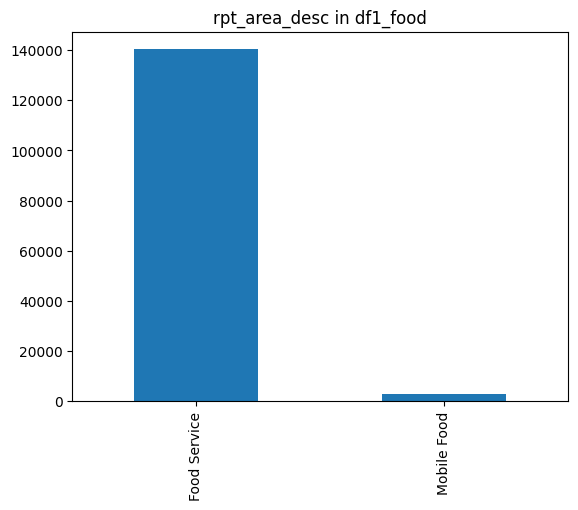

In [199]:
# Count number of each unique entry in df1_food's 'rpt_area_desc' column and plot them as a bar plot
df1_food["rpt_area_desc"].value_counts().plot(kind = 'bar', title = 'rpt_area_desc in df1_food')

<Axes: title={'center': 'type_description in df3_food'}>

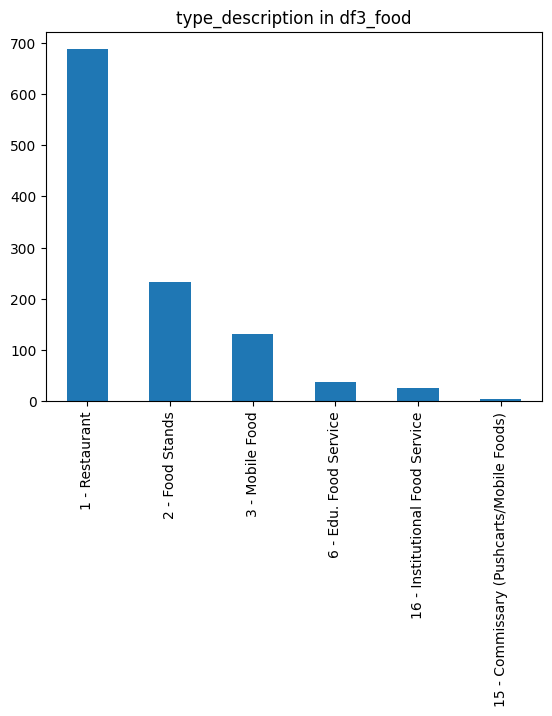

In [200]:
# Count number of each unique entry in df3_food's 'type_description' column and plot them as a bar plot
df3_food['type_description'].value_counts().plot(kind = 'bar', title = 'type_description in df3_food')

<Axes: title={'center': 'est_group_desc in df3_food'}>

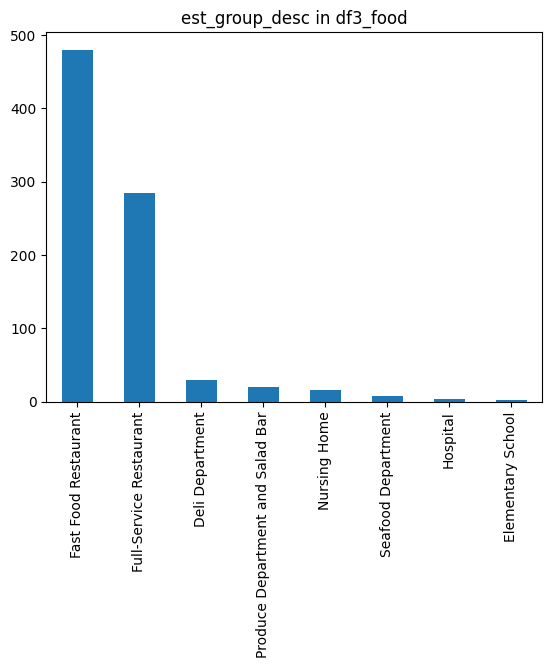

In [201]:
# Count number of each unique entry in df3_food's 'est_group_desc' column and plot them as a bar plot
df3_food['est_group_desc'].value_counts().plot(kind = 'bar', title = 'est_group_desc in df3_food')

# Data Cleaning

In [202]:
# First convert the 'id' columns of both dataframes to the same data type.
df1_food['id'] =df1_food['id'].astype(int)
df3_food['id'] =df3_food['id'].astype(int)

# Join df1_food and df3_food on 'id'
df = df1_food.join(df3_food, on = 'id', lsuffix = '1')

# Print the head and tail of df which is a join of both df1_food and df3_food.
print(df.head(2))
print(df.tail(2))

<ipython-input-202-f193ed83d858>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_food['id'] =df3_food['id'].astype(int)


       rpt_area_desc1                                           comments item  \
103894   Food Service  Open beverages stored above prep surface.  emp...    2   
27895    Food Service                                               None    7   

       inspection_id critical  weight_sum      id1 type_description  \
103894       1068288        Y         1.5  1003113              NaN   
27895        1068288        Y         NaN  1003114              NaN   

       est_group_desc opening_date  ... premise_city premise_name water  \
103894            NaN          NaN  ...          NaN          NaN   NaN   
27895             NaN          NaN  ...          NaN          NaN   NaN   

        rpt_area_desc  closing_date hours_of_operation smoking_allowed sewage  \
103894            NaN           NaN                NaN             NaN    NaN   
27895             NaN           NaN                NaN             NaN    NaN   

       latitude  longitude  
103894      NaN        NaN  
27895       Na

The data above shows the joined dataframe is filled with Nans indicating that no matches were made of on the the 'id'.

In [203]:
# Check the max and min values of the ids in df1_food and df3_food to see if they overlap
print('df1_food max: ' + str(max(df1_food['id'])) + ' ; df1_food min: ' + str(min(df1_food['id'])))
print('df3_food max: ' + str(max(df3_food['id'])) + ' ; df3_food min: ' + str(min(df3_food['id'])))



df1_food max: 6882767 ; df1_food min: 744890
df3_food max: 193403 ; df3_food min: 55461


The IDs of the two dataframes do not overlap. It would be good to investigate why and if there is way to join the dataframes (e.g. on names of facilities).

In [204]:
# Remove observations without comments from df_1 food.
df1_food = df1_food.dropna(subset = ['comments'])
print(df1_food.shape)

(99905, 7)
